<a href="https://colab.research.google.com/github/Inder-Dhillon/Toronto-Accidents-As-A-Network/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (469 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.

In [2]:
!wget https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/blob/main/accident.py?raw=true
!mv accident.py\?raw\=true accident.py

--2020-12-16 18:06:58--  https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/blob/main/accident.py?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/raw/main/accident.py [following]
--2020-12-16 18:06:58--  https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/raw/main/accident.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/main/accident.py [following]
--2020-12-16 18:06:58--  https://raw.githubusercontent.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/main/accident.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubuserconten

In [3]:
!wget https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/blob/main/graph_generator.py?raw=true
!mv graph_generator.py\?raw\=true graph_generator.py

--2020-12-16 18:07:05--  https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/blob/main/graph_generator.py?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/raw/main/graph_generator.py [following]
--2020-12-16 18:07:05--  https://github.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/raw/main/graph_generator.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/main/graph_generator.py [following]
--2020-12-16 18:07:05--  https://raw.githubusercontent.com/Inder-Dhillon/Toronto-Accidents-As-A-Network/main/graph_generator.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...

In [4]:
pip install osmnx

     |████████████████████████████████| 92kB 4.8MB/s 
     |████████████████████████████████| 6.5MB 10.5MB/s 
     |████████████████████████████████| 972kB 44.1MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 14.5MB 302kB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 11.6MB 40.6MB/s 
     |████████████████████████████████| 14.8MB 329kB/s 
  Created wheel for Rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21768 sha256=6ffd2c18420243374f0c451134eba2d5888ac592aaf07fec9a9d94ba5afa2024
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built Rtree
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement foli

In [5]:
import osmnx as ox
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import itertools
import graph_generator as graph_gen

In [2]:
G = graph_gen.create_tor_graph()

## PageRank

In [ ]:
def pagerank_top_n(G, n):
  pr = nx.pagerank_scipy(G, weight='w')
  pr = pd.DataFrame.from_dict(pr, orient='index').sort_values(by=0, ascending=False).rename(columns={0:"PageRank Score"})
  return pr.iloc[:n]

In [ ]:
top_50 = pagerank_top_n(G, 10)
top_50

,PageRank Score
21421640,0.000127
32424739,0.000126
32424740,0.000125
29657708,0.000124
85942894,0.000122
32499036,0.000122
430599203,0.000120
32412371,0.000119
32755967,0.000119
4392687493,0.000119


In [ ]:
top_50_nodes = list(top_50.index.values)

In [ ]:
ec = ['r' if node in top_50_nodes else (0,0,0,0) for node in G.nodes]
ox.plot_graph(G, bgcolor='white', node_size=20, node_color=ec, edge_linewidth=0.4, edge_alpha=1, dpi=300, figsize=(20,20))

## Routing

In [ ]:
# add speed on all edges missing data
G = ox.add_edge_speeds(G)
# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

In [ ]:
def print_route_time_distance(route):
  route_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length')))/1000
  route_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route, 'travel_time')))/60
  route_weight = int(sum(ox.utils_graph.get_route_edge_attributes(G, route, 'w')))
  print('Route is', format(route_length, '.2f'), 'kms and takes', format(route_time, '.2f'), 'minutes. This route has a total injury index of: ', route_weight)


Get the safest route using Dijkstra's algorithm

In [ ]:
def get_route_by_risk(origin, destination):
  return nx.shortest_path(G, source=origin, target = destination, weight = 'w', method='dijkstra')

def get_route_by_length(origin, destination):
  return nx.shortest_path(G, source=origin, target = destination, weight = 'length', method='dijkstra')

def get_route_by_time(origin, destination):
  return nx.shortest_path(G, source=origin, target = destination, weight = 'travel_time', method='dijkstra')


Plotting the route

In [ ]:
def plot_route(route_list, color):
  ox.plot_graph_route(G, bgcolor='white', node_size=1.0, node_color='gray', edge_color='gray',route=route_list, route_color = color, dpi=300, figsize=(20,20))

In [ ]:
orig = list(G)[1]
dest = list(G)[-1]
route_time = get_route_by_time(orig, dest)
route_distance = get_route_by_length(orig, dest)
route_risk = get_route_by_risk(orig, dest)

In [ ]:
#Printing route's time and distance
print("Quickest route")
print_route_time_distance(route_time)
print("Shortest route")
print_route_time_distance(route_distance)
print("Least accident prone route")
print_route_time_distance(route_risk)

In [ ]:
plot_route(route_time, 'b')

In [ ]:
plot_route(route_distance, 'r')

In [ ]:
plot_route(route_risk, 'g')

## Clustering

In [3]:
def most_central_edge(net):
    centrality = nx.edge_betweenness_centrality(net, k = 25)
    return max(centrality, key=centrality.get)

In [6]:
gn = girvan_newman(G, most_valuable_edge=most_central_edge)
limited = itertools.takewhile(lambda c: len(c) <= 100, gn)

In [7]:
communities = None
for communities in limited:
    pass
community_tuple = tuple(c for c in communities)

In [10]:
cc1 = community_tuple[0]
cc2 = community_tuple[1]
cc3 = community_tuple[2]
cc4 = community_tuple[3]

In [42]:
list(G.edges.data())[0][2]['w']

3.8412509498924434

Injury Index of nodes in each community

In [27]:
def average_injury_index(community):
  total_idx = 0
  for node in community:
    for accident in G.nodes()[node]['accident_list']:
      total_idx = total_idx + accident.inj_index
  return total_idx/len(community)


In [45]:
def average_accident_weight(community):
  total_weight = 0
  edge_count = 0
  for edge in list(G.edges.data()):
    if (edge[0] in community) or (edge[1] in community):
      total_weight = total_weight + edge[2]['w']
      edge_count = edge_count + 1
  
  return total_weight/edge_count

In [32]:
injury_index_average(cc1)

0.23473621813870743

In [50]:
average_accident_weight(cc1)

8.950256785446792

## Printing Graphs

In [43]:
# nc = ['red' if node in cc else 'gray' for node in G.nodes()]
# ec = ['red' if (edge[0] in cc) or (edge[1] in cc) else 'gray' for edge in G.edges()]
ec = []
for edge in G.edges():
  if (edge[0] in cc1) or (edge[1] in cc1):
    ec.append('red')
  elif (edge[0] in cc2) or (edge[1] in cc2):
    ec.append('blue')
  elif (edge[0] in cc3) or (edge[1] in cc3):
    ec.append('green')
  elif (edge[0] in cc4) or (edge[1] in cc4):
    ec.append('orange')
  else:
    ec.append("gray")

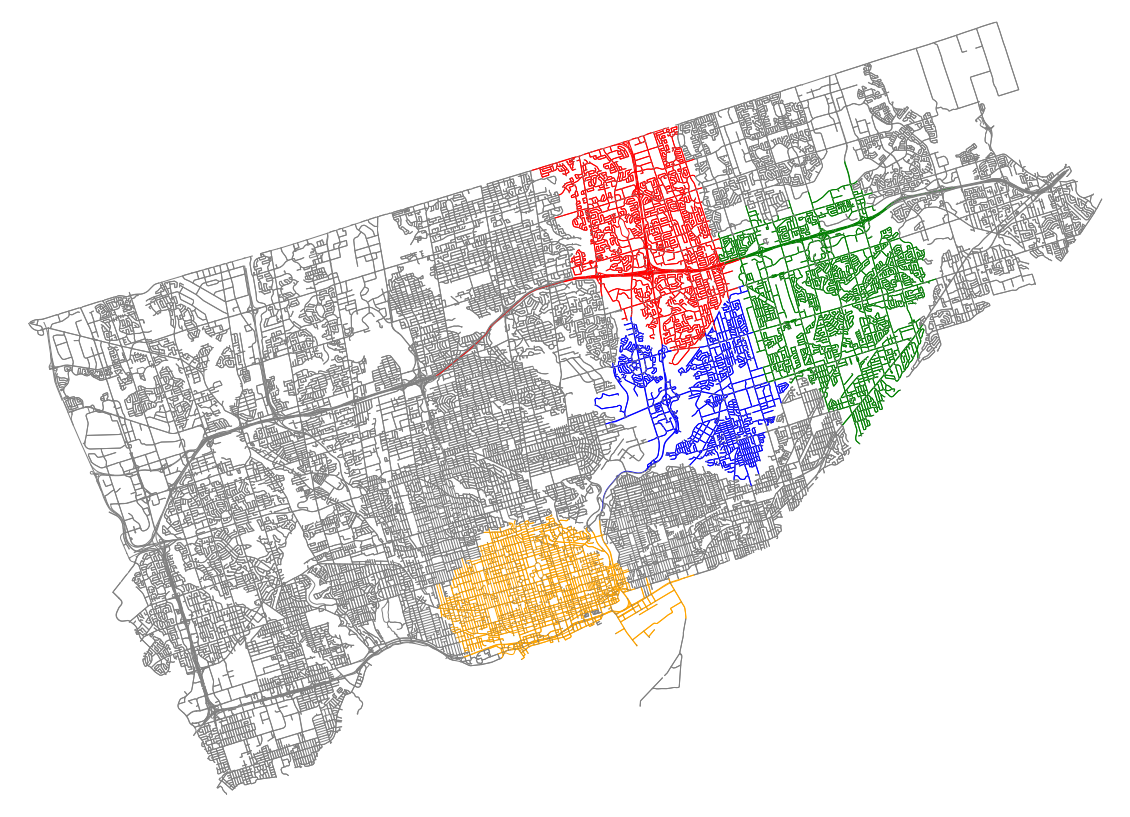

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

In [44]:
ox.plot_graph(G, bgcolor='white', node_size=1.0, node_color='gray', edge_color=ec, edge_linewidth=1.0, edge_alpha=1, dpi=300, figsize=(20,20))